In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_context("paper")
import matplotlib.ticker as ticker

from tqdm import tqdm # progress bars :)
tqdm.pandas()
from sklearn.metrics import r2_score
import scipy as sp

In [69]:
ep = pd.read_csv("gtdb-rs202.evolpaths.protein.csv.gz")
ep

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,EzAAIm coverage threshold,EzAAIb AAI,EzAAIb anchor CDS count,EzAAIb compare CDS count,EzAAIb matched CDS count,EzAAIb proteome coverage,EzAAIb id threshold,EzAAIb coverage threshold,minContain AAI,avgContain AAI
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,protein,7,100,0.257015,0.615836,...,0.5,0.929249,1965,3590,1583,0.569937,0.3,0.3,0.844403,0.888747
1,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,protein,7,200,0.256108,0.608974,...,0.5,0.929249,1965,3590,1583,0.569937,0.3,0.3,0.844570,0.888084
2,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,protein,7,100,0.027745,0.084447,...,0.5,0.634232,1965,3596,1057,0.380147,0.3,0.3,0.630662,0.666588
3,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,protein,7,200,0.027002,0.081731,...,0.5,0.634232,1965,3596,1057,0.380147,0.3,0.3,0.628554,0.663897
4,GCA_004524385.1_x_GCF_008000775.1,GCA_004524385.1,GCF_008000775.1,path1,order,protein,7,100,0.007232,0.025111,...,0.5,0.512164,1965,3935,482,0.163390,0.3,0.3,0.518349,0.554554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98275,GCA_002409405.1_x_GCA_002317435.1,GCA_002409405.1,GCA_002317435.1,path999,class,protein,10,200,0.002932,0.007312,...,0.5,0.541283,3045,2107,356,0.138199,0.3,0.3,0.587161,0.599336
98276,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,10,100,0.001910,0.004136,...,0.5,0.507907,3045,2723,369,0.127947,0.3,0.3,0.568680,0.573161
98277,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,10,200,0.001676,0.003613,...,0.5,0.507907,3045,2723,369,0.127947,0.3,0.3,0.561532,0.565705
98278,GCA_002409405.1_x_GCF_004319585.1,GCA_002409405.1,GCF_004319585.1,path999,superkingdom,protein,10,100,0.000573,0.001179,...,0.5,0.484488,3045,3603,283,0.085138,0.3,0.3,0.506599,0.508057


In [70]:
ep.columns

Index(['comparison_name', 'anchor_name', 'compare_name', 'path',
       'lowest_common_rank', 'alphabet', 'ksize', 'scaled', 'jaccard',
       'max_containment', 'anchor_containment', 'compare_containment',
       'anchor_hashes', 'compare_hashes', 'num_common', 'jaccard AAI',
       'containA AAI', 'containAaai_low', 'containAaai_high', 'containB AAI',
       'containBaai_low', 'containBaai_high', 'maxContain AAI', 'acANI',
       'alpha-ksize', 'compareM AAI', 'compareM_std_aai', 'genes_in_anchor',
       'genes_in_ref', 'orthologous_genes', 'orthologous_fraction',
       'ANIb ident', 'ANIb_coverage', 'ANIb_aln_length', 'ANIb_sim_errors',
       'ANIb_hadamard', 'ANIm ident', 'ANIm_coverage', 'ANIm_aln_length',
       'ANIm_sim_errors', 'ANIm_hadamard', 'fastani ANI',
       'num_bidirectional_fragment_mappings', 'total_query_fragments',
       'EzAAIm AAI', 'EzAAIm anchor CDS count', 'EzAAIm compare CDS count',
       'EzAAIm matched CDS count', 'EzAAIm proteome coverage',
       '

In [71]:
len(ep[ep["EzAAIb AAI"].notna()] )

98280

In [72]:
compare_id_vars = ["comparison_name", "path", 
                   "lowest_common_rank", "anchor_name", 
                   "compare_name", "alpha-ksize", 
                   "alphabet", "ksize","scaled", 
                   #"fastani ANI", "ANIm ident", 
                    #"ANIb ident", "ANIb_coverage",
                   "EzAAIb AAI"]

prot_value_vars = ["jaccard AAI", "containA AAI", 
                   "containB AAI", "maxContain AAI", 
                   "minContain AAI", "avgContain AAI",
                   "compareM AAI", "EzAAIm AAI"]

rankorder = ["genus", "family", "order", "class", "phylum", "superkingdom"]

aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b", "ezAAIm AAI": "#4E0707",
              "EzAAIm AAI": "#A3623A"}

In [73]:
melted=pd.melt(ep,id_vars= compare_id_vars,
                     value_vars=prot_value_vars,
                     var_name='estimator', value_name='AAI')
melted

,comparison_name,path,lowest_common_rank,anchor_name,compare_name,alpha-ksize,alphabet,ksize,scaled,EzAAIb AAI,estimator,AAI
0,GCA_004524385.1_x_GCA_004524535.1,path1,genus,GCA_004524385.1,GCA_004524535.1,protein-7,protein,7,100,0.929249,jaccard AAI,0.880078
1,GCA_004524385.1_x_GCA_004524535.1,path1,genus,GCA_004524385.1,GCA_004524535.1,protein-7,protein,7,200,0.929249,jaccard AAI,NaN
2,GCA_004524385.1_x_GCA_011364975.1,path1,family,GCA_004524385.1,GCA_011364975.1,protein-7,protein,7,100,0.634232,jaccard AAI,0.659027
3,GCA_004524385.1_x_GCA_011364975.1,path1,family,GCA_004524385.1,GCA_011364975.1,protein-7,protein,7,200,0.634232,jaccard AAI,NaN
4,GCA_004524385.1_x_GCF_008000775.1,path1,order,GCA_004524385.1,GCF_008000775.1,protein-7,protein,7,100,0.512164,jaccard AAI,0.545423
...,...,...,...,...,...,...,...,...,...,...,...,...
786235,GCA_002409405.1_x_GCA_002317435.1,path999,class,GCA_002409405.1,GCA_002317435.1,protein-10,protein,10,200,0.541283,EzAAIm AAI,0.543715
786236,GCA_002409405.1_x_GCA_003567135.1,path999,phylum,GCA_002409405.1,GCA_003567135.1,protein-10,protein,10,100,0.507907,EzAAIm AAI,0.507298
786237,GCA_002409405.1_x_GCA_003567135.1,path999,phylum,GCA_002409405.1,GCA_003567135.1,protein-10,protein,10,200,0.507907,EzAAIm AAI,0.507298
786238,GCA_002409405.1_x_GCF_004319585.1,path999,superkingdom,GCA_002409405.1,GCF_004319585.1,protein-10,protein,10,100,0.484488,EzAAIm AAI,0.485674


In [74]:
melted["AAIdiff"] = melted["AAI"] - melted['EzAAIb AAI']
melted

,comparison_name,path,lowest_common_rank,anchor_name,compare_name,alpha-ksize,alphabet,ksize,scaled,EzAAIb AAI,estimator,AAI,AAIdiff
0,GCA_004524385.1_x_GCA_004524535.1,path1,genus,GCA_004524385.1,GCA_004524535.1,protein-7,protein,7,100,0.929249,jaccard AAI,0.880078,-0.049171
1,GCA_004524385.1_x_GCA_004524535.1,path1,genus,GCA_004524385.1,GCA_004524535.1,protein-7,protein,7,200,0.929249,jaccard AAI,NaN,NaN
2,GCA_004524385.1_x_GCA_011364975.1,path1,family,GCA_004524385.1,GCA_011364975.1,protein-7,protein,7,100,0.634232,jaccard AAI,0.659027,0.024795
3,GCA_004524385.1_x_GCA_011364975.1,path1,family,GCA_004524385.1,GCA_011364975.1,protein-7,protein,7,200,0.634232,jaccard AAI,NaN,NaN
4,GCA_004524385.1_x_GCF_008000775.1,path1,order,GCA_004524385.1,GCF_008000775.1,protein-7,protein,7,100,0.512164,jaccard AAI,0.545423,0.033259
...,...,...,...,...,...,...,...,...,...,...,...,...,...
786235,GCA_002409405.1_x_GCA_002317435.1,path999,class,GCA_002409405.1,GCA_002317435.1,protein-10,protein,10,200,0.541283,EzAAIm AAI,0.543715,0.002432
786236,GCA_002409405.1_x_GCA_003567135.1,path999,phylum,GCA_002409405.1,GCA_003567135.1,protein-10,protein,10,100,0.507907,EzAAIm AAI,0.507298,-0.000610
786237,GCA_002409405.1_x_GCA_003567135.1,path999,phylum,GCA_002409405.1,GCA_003567135.1,protein-10,protein,10,200,0.507907,EzAAIm AAI,0.507298,-0.000610
786238,GCA_002409405.1_x_GCF_004319585.1,path999,superkingdom,GCA_002409405.1,GCF_004319585.1,protein-10,protein,10,100,0.484488,EzAAIm AAI,0.485674,0.001186


In [75]:
melted['scaled'].unique()

array([100, 200])

In [76]:
scaled200 = melted[melted["scaled"] == 200]
scaled100 = melted[melted["scaled"] == 100]

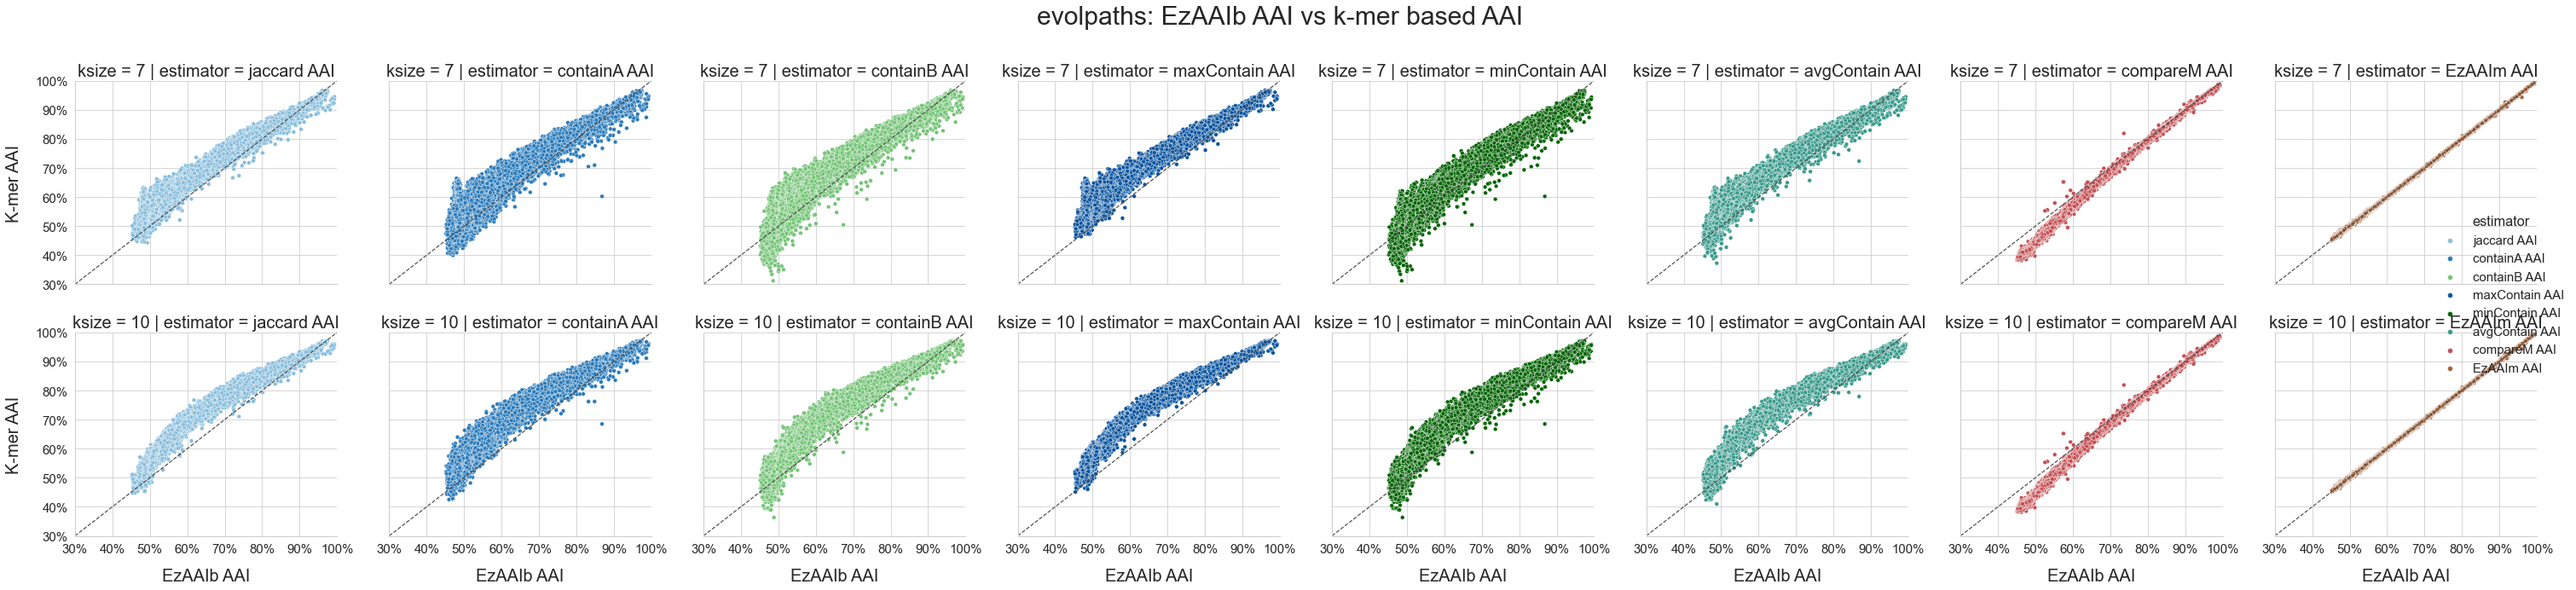

In [77]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.relplot(data=scaled100, 
                  x="EzAAIb AAI", y="AAI", 
                  hue="estimator",col="estimator", 
                  row="ksize", palette=aai_colors)
    
    #plt.gcf().set_size_inches(11, 7)
    xlim=(0.3, 1)
    ylim= (0.3, 1)
    for ax in g.fig.axes:
        ax.set(xlim=xlim, ylim=ylim)
        ax.plot(xlim, ylim, ls="--", c=".3")
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    
    g.set_axis_labels("EzAAIb AAI", "K-mer AAI", size=20, labelpad=15)
    g.fig.suptitle('evolpaths: EzAAIb AAI vs k-mer based AAI')
    g.fig.tight_layout()
    #plt.xlabel("FastANI ANI", size=20, labelpad=15)
    #plt.ylabel("K-mer ANI", size=25)
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    #fig = g.get_figure()

In [78]:
scaled100_k10 = scaled100[scaled100['ksize'] == 10]
scaled100_k7 = scaled100[scaled100['ksize'] == 7]
scaled200_k10 = scaled200[scaled200['ksize'] == 10]
scaled200_k7 = scaled200[scaled200['ksize'] == 7]

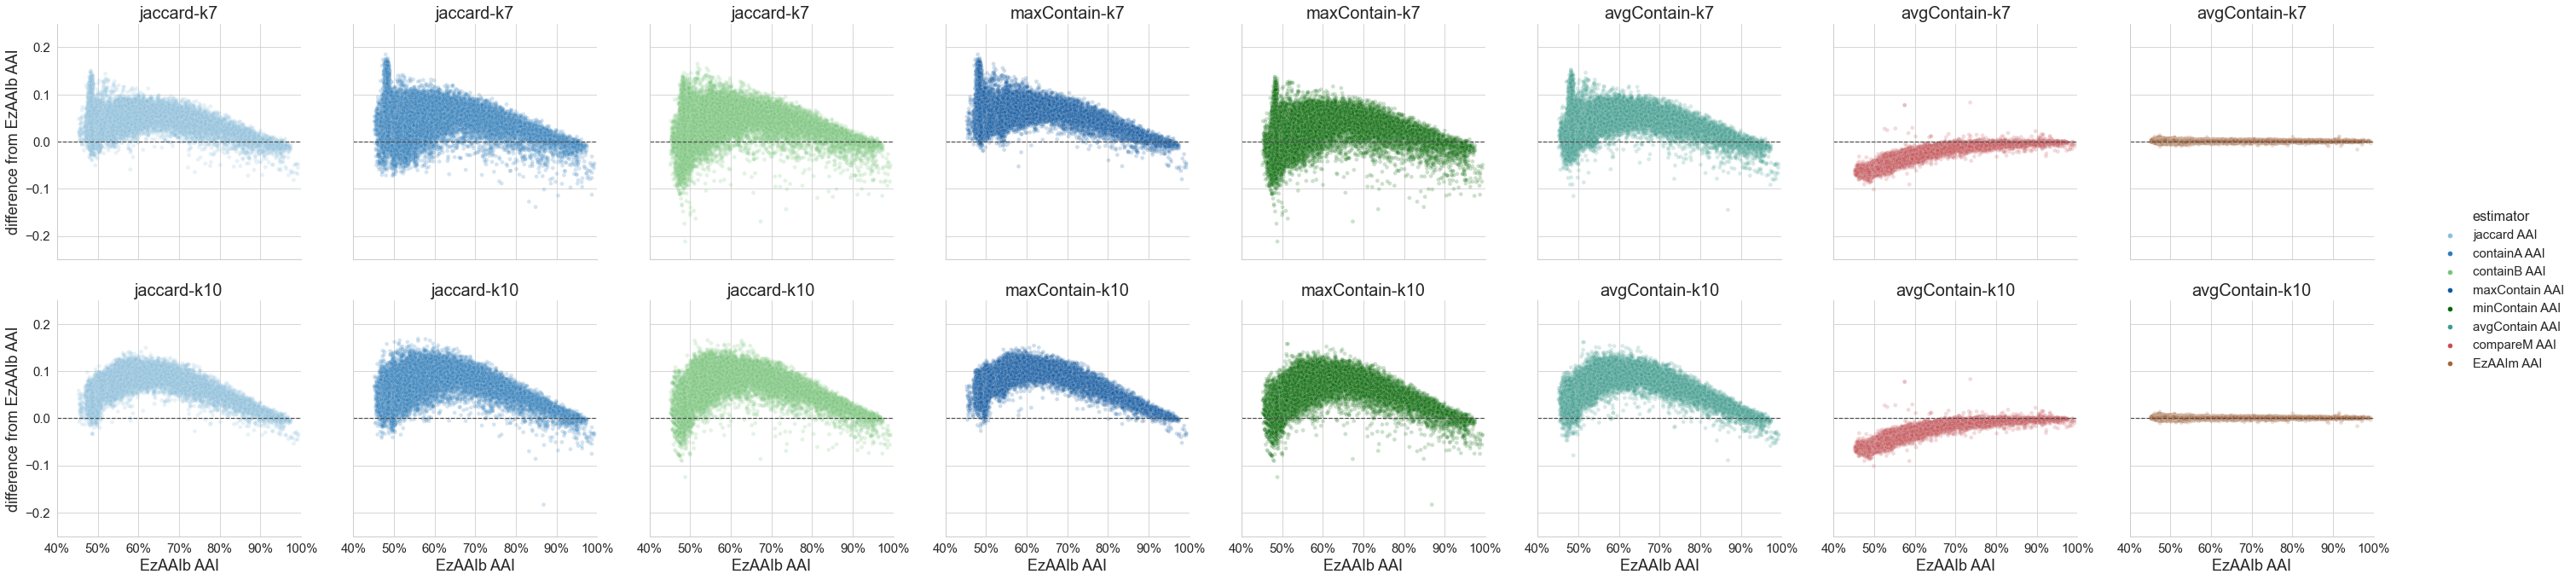

In [79]:
#sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.relplot(data=scaled100, x="EzAAIb AAI", y="AAIdiff", hue="estimator",col="estimator",row="ksize", palette=aai_colors, alpha=0.2)
    g.set(xlim=(.4, 1), ylim=(-0.25, 0.25))

    for ax in g.fig.axes:
        ax.axhline(0, ls="--", c=".3")
        ax.set_xlabel("EzAAIb AAI", size=18)
        ax.set_ylabel("difference from EzAAIb AAI", size=18)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
   #     ax.yaxis.set_major_locator(ticker.MultipleLocator(0.01))
        #ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        title = ax.get_title()
        if "jaccard" in title:
            new_title = "jaccard"
        elif "max" in title:
            new_title = "maxContain"
        elif "avg" in title:
            new_title = "avgContain"
        if "7" in title and "7" not in new_title:
            new_title += "-k7"
        elif "10" in title and "10" not in new_title:
            new_title += "-k10"
        #print(title, new_title)
        ax.set_title(new_title)
        #new_title=""
    g.tight_layout()

Text(0.5, 1.0, 'Similarity of AAI estimation approaches to EzAAIb AAI')

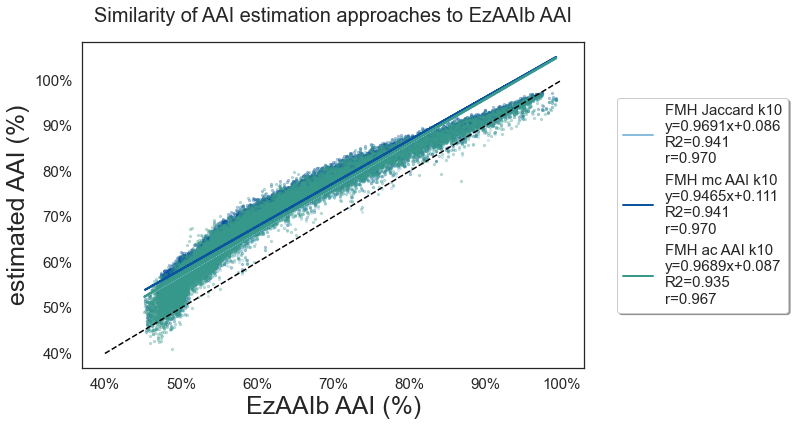

In [91]:
# do the linear regressions manually; plot all on same plot
vars_of_interest = ["jaccard AAI", "maxContain AAI", "avgContain AAI"]#, "EzAAIm AAI", "CompareM AAI"]
labelD = {"jaccard AAI": "FMH Jaccard k10", "maxContain AAI": "FMH mc AAI k10", "avgContain AAI": "FMH ac AAI k10"}#, "EzAAIm AAI": "EzAAIm AAI", "CompareM AAI": "CompareM AAI"}
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

for var in vars_of_interest:
    x_col = "EzAAIb AAI"
    y_col = "AAI"
    color = aai_colors[var]
    df = scaled100_k10[scaled100_k10['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.3, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(df[y_col], predict_y)
    line_label = f'{labelD[var]}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    plt.plot(df[x_col], predict_y, color = color, label = line_label, linewidth=2)


    #plt.plot(df[x_col], predict_y, color = color, label = r_label)
    
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    
    
xlim=(0.4, 1)#None
ylim= (0.4, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("estimated AAI (%)", size=25)
ax.set_xlabel("EzAAIb AAI (%)", size=25)
#plt.legend(loc = 'best')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
plt.title("Similarity of AAI estimation approaches to EzAAIb AAI", pad=20, size=20)



Text(0.5, 1.0, 'Similarity of AAI estimation approaches to EzAAIb AAI')

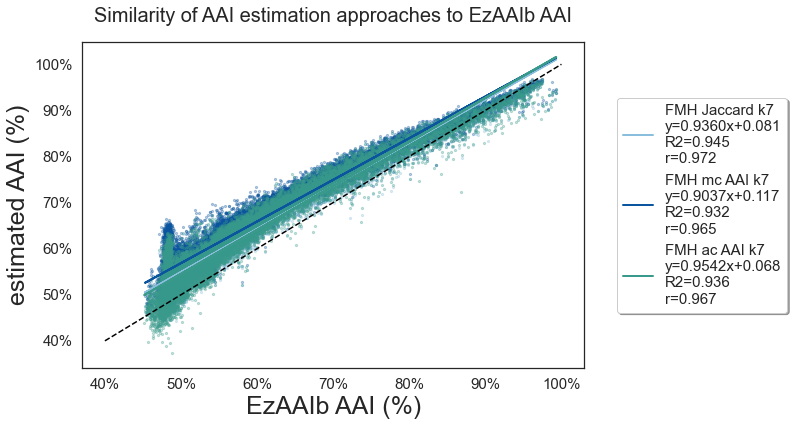

In [81]:
# do the linear regressions manually; plot all on same plot
vars_of_interest = ["jaccard AAI", "maxContain AAI", "avgContain AAI"]
labelD = {"jaccard AAI": "FMH Jaccard k7", "maxContain AAI": "FMH mc AAI k7", "avgContain AAI": "FMH ac AAI k7"}
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

for var in vars_of_interest:
    x_col = "EzAAIb AAI"
    y_col = "AAI"
    color = aai_colors[var]
    df = scaled100_k7[scaled100_k7['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.3, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(df[y_col], predict_y)
    line_label = f'{labelD[var]}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    plt.plot(df[x_col], predict_y, color = color, label = line_label, linewidth=2)


    #plt.plot(df[x_col], predict_y, color = color, label = r_label)
    
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    
    
xlim=(0.4, 1)#None
ylim= (0.4, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("estimated AAI (%)", size=25)
ax.set_xlabel("EzAAIb AAI (%)", size=25)
#plt.legend(loc = 'best')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
plt.title("Similarity of AAI estimation approaches to EzAAIb AAI", pad=20, size=20)


# AAIdiff

Text(0.5, 1.0, 'Similarity of AAI estimation approaches to EzAAIb AAI')

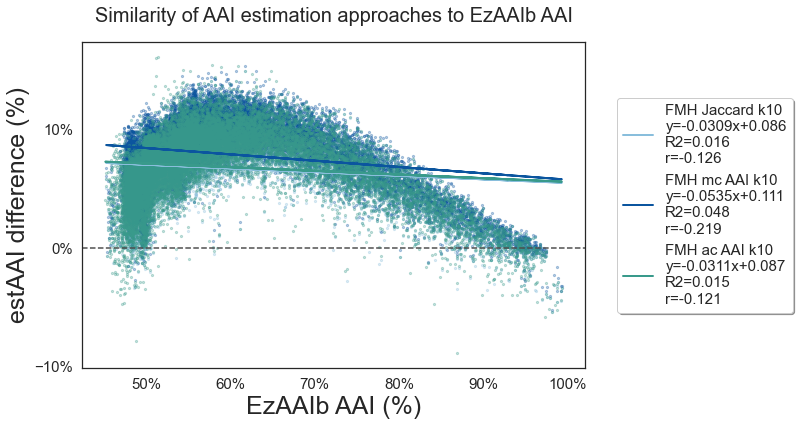

In [82]:
# do the linear regressions manually; plot all on same plot
vars_of_interest = ["jaccard AAI", "maxContain AAI", "avgContain AAI"]
labelD = {"jaccard AAI": "FMH Jaccard k10", "maxContain AAI": "FMH mc AAI k10", "avgContain AAI": "FMH ac AAI k10"}
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

for var in vars_of_interest:
    x_col = "EzAAIb AAI"
    y_col = "AAIdiff"
    color = aai_colors[var]
    df = scaled100_k10[scaled100_k10['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.3, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(df[y_col], predict_y)
    line_label = f'{labelD[var]}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    plt.plot(df[x_col], predict_y, color = color, label = line_label, linewidth=2)


    #plt.plot(df[x_col], predict_y, color = color, label = r_label)
    
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    
    
xlim=(0.4, 1)#None
ylim= (-0.2, 0.2)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.axhline(0, ls="--", c=".3")

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("estAAI difference (%)", size=25)
ax.set_xlabel("EzAAIb AAI (%)", size=25)
#plt.legend(loc = 'best')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
plt.title("Similarity of AAI estimation approaches to EzAAIb AAI", pad=20, size=20)


Text(0.5, 1.0, 'Similarity of AAI estimation approaches to EzAAIb AAI')

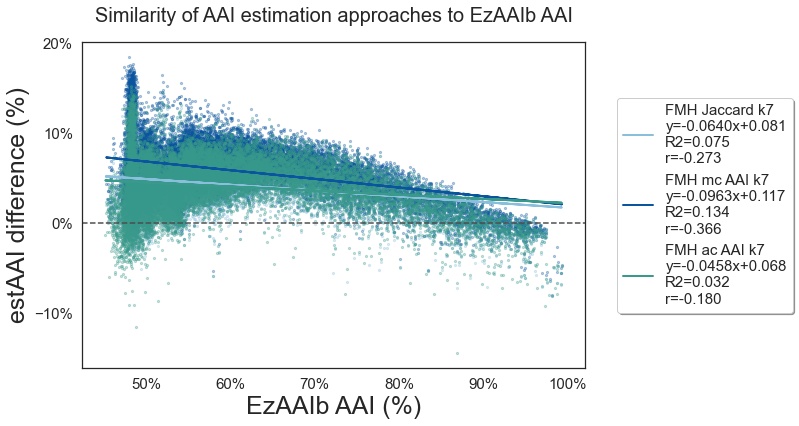

In [83]:
# do the linear regressions manually; plot all on same plot
vars_of_interest = ["jaccard AAI", "maxContain AAI", "avgContain AAI"]
labelD = {"jaccard AAI": "FMH Jaccard k7", "maxContain AAI": "FMH mc AAI k7", "avgContain AAI": "FMH ac AAI k7"}
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

for var in vars_of_interest:
    x_col = "EzAAIb AAI"
    y_col = "AAIdiff"
    color = aai_colors[var]
    df = scaled100_k7[scaled100_k7['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.3, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(df[y_col], predict_y)
    line_label = f'{labelD[var]}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    plt.plot(df[x_col], predict_y, color = color, label = line_label, linewidth=2)


    #plt.plot(df[x_col], predict_y, color = color, label = r_label)
    
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    
    
xlim=(0.4, 1)#None
ylim= (-0.2, 0.2)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.axhline(0, ls="--", c=".3")

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("estAAI difference (%)", size=25)
ax.set_xlabel("EzAAIb AAI (%)", size=25)
#plt.legend(loc = 'best')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
plt.title("Similarity of AAI estimation approaches to EzAAIb AAI", pad=20, size=20)


In [84]:
melted.estimator.unique()

array(['jaccard AAI', 'containA AAI', 'containB AAI', 'maxContain AAI',
       'minContain AAI', 'avgContain AAI', 'compareM AAI', 'EzAAIm AAI'],
      dtype=object)

In [85]:
melted

,comparison_name,path,lowest_common_rank,anchor_name,compare_name,alpha-ksize,alphabet,ksize,scaled,EzAAIb AAI,estimator,AAI,AAIdiff
0,GCA_004524385.1_x_GCA_004524535.1,path1,genus,GCA_004524385.1,GCA_004524535.1,protein-7,protein,7,100,0.929249,jaccard AAI,0.880078,-0.049171
1,GCA_004524385.1_x_GCA_004524535.1,path1,genus,GCA_004524385.1,GCA_004524535.1,protein-7,protein,7,200,0.929249,jaccard AAI,NaN,NaN
2,GCA_004524385.1_x_GCA_011364975.1,path1,family,GCA_004524385.1,GCA_011364975.1,protein-7,protein,7,100,0.634232,jaccard AAI,0.659027,0.024795
3,GCA_004524385.1_x_GCA_011364975.1,path1,family,GCA_004524385.1,GCA_011364975.1,protein-7,protein,7,200,0.634232,jaccard AAI,NaN,NaN
4,GCA_004524385.1_x_GCF_008000775.1,path1,order,GCA_004524385.1,GCF_008000775.1,protein-7,protein,7,100,0.512164,jaccard AAI,0.545423,0.033259
...,...,...,...,...,...,...,...,...,...,...,...,...,...
786235,GCA_002409405.1_x_GCA_002317435.1,path999,class,GCA_002409405.1,GCA_002317435.1,protein-10,protein,10,200,0.541283,EzAAIm AAI,0.543715,0.002432
786236,GCA_002409405.1_x_GCA_003567135.1,path999,phylum,GCA_002409405.1,GCA_003567135.1,protein-10,protein,10,100,0.507907,EzAAIm AAI,0.507298,-0.000610
786237,GCA_002409405.1_x_GCA_003567135.1,path999,phylum,GCA_002409405.1,GCA_003567135.1,protein-10,protein,10,200,0.507907,EzAAIm AAI,0.507298,-0.000610
786238,GCA_002409405.1_x_GCF_004319585.1,path999,superkingdom,GCA_002409405.1,GCF_004319585.1,protein-10,protein,10,100,0.484488,EzAAIm AAI,0.485674,0.001186


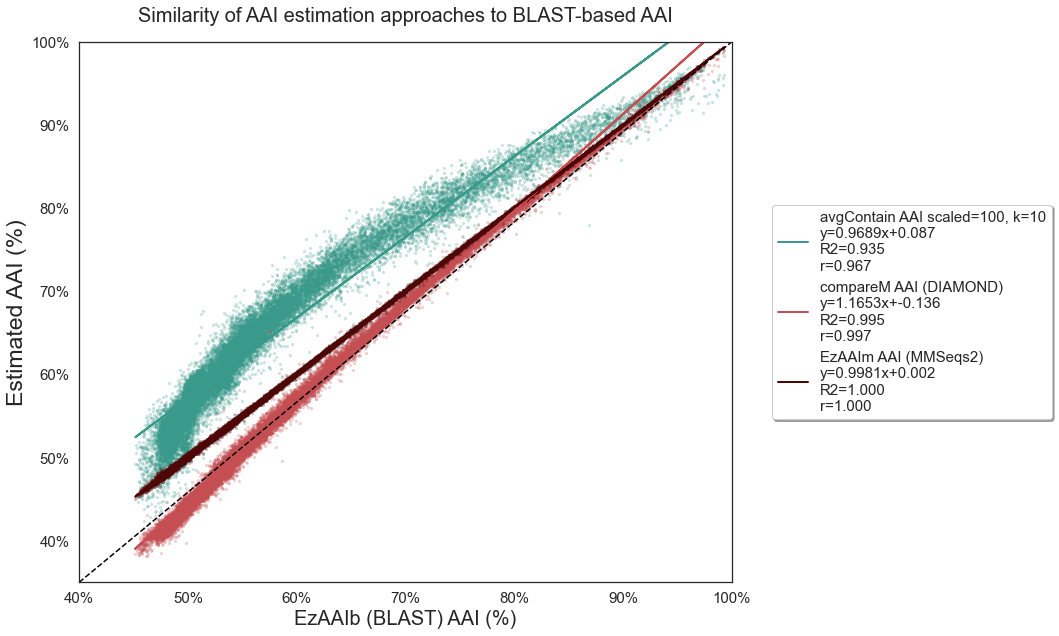

In [92]:
# do the linear regressions manually; plot all on same plot
kmer_vars = ["avgContain AAI"]#, "maxContain AAI"]
mapping_vars = ["compareM AAI", "EzAAIm AAI"]
vars_of_interest = kmer_vars + mapping_vars
labelD = {"jaccard AAI": "Jaccard", "maxContain AAI": "maxContain AAI", "avgContain AAI": "avgContain AAI", "compareM AAI": "compareM AAI (DIAMOND)", "EzAAIm AAI": "EzAAIm AAI (MMSeqs2)"}
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)


aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b", "EzAAIm AAI": "#4E0707",
              "EzAAIb AAI": "#4E0707"}

colorD = ["#399a8b","#0b559f"]

dfs = [scaled100_k10]
param_labels = ["scaled=100, k=10"]#,#"scaled=1, k=8"]
alphaD = [0.2, 0.2]
linewidthD = [2, 2]

for n, df in enumerate(dfs):
    df = dfs[n]
    df = df.drop(columns= ["AAIdiff"])
    for var in kmer_vars:
        x_col = "EzAAIb AAI"
        y_col = "AAI"
        #color = aai_colors[var]
        color = colorD[n]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
        #r_value is pearson correlation coefficient
        predict_y = slope * var_df[x_col] + intercept
        # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
        r_squared = r2_score(var_df[y_col], predict_y)
        label = labelD[var] + " " + param_labels[n]
        line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)

for var in mapping_vars:
    x_col = "EzAAIb AAI"
    y_col = "AAI"
    color = aai_colors[var]
    var_df = df[df['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(var_df[x_col], var_df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * var_df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(var_df[y_col], predict_y)
    label = labelD[var]# + " " + param_labels[n]
    line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
xlim=(0.4, 1)#None
ylim=(0.35, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"
plt.xlim(xlim)
plt.ylim(ylim)

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


    #plt.autoscale(True)
ax.set_ylabel("Estimated AAI (%)", size=23)
ax.set_xlabel("EzAAIb (BLAST) AAI (%)", size=20)
    #plt.legend(loc = 'best')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Similarity of AAI estimation approaches to BLAST-based AAI", pad=20, size=20)
#fig.suptitle("Similarity of AAI estimation approaches to EzAAIm AAI", size=20)#, pad=20, size=20)
fig.tight_layout()
#fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k8.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
#fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k8.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

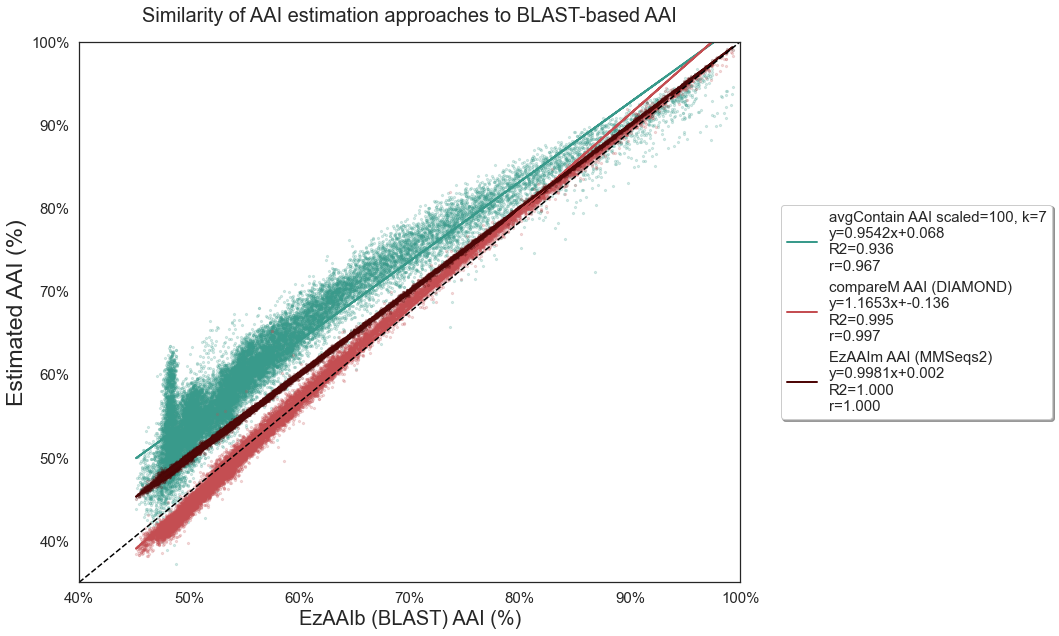

In [94]:
# do the linear regressions manually; plot all on same plot
kmer_vars = ["avgContain AAI"]#, "maxContain AAI"]
mapping_vars = ["compareM AAI", "EzAAIm AAI"]
vars_of_interest = kmer_vars + mapping_vars
labelD = {"jaccard AAI": "Jaccard", "maxContain AAI": "maxContain AAI", "avgContain AAI": "avgContain AAI", "compareM AAI": "compareM AAI (DIAMOND)", "EzAAIm AAI": "EzAAIm AAI (MMSeqs2)"}
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)


aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b", "EzAAIm AAI": "#4E0707",
              "EzAAIb AAI": "#4E0707"}

colorD = ["#399a8b","#0b559f"]

dfs = [scaled100_k10]
param_labels = ["scaled=100, k=10"]#,#"scaled=1, k=8"]
alphaD = [0.2, 0.2]
linewidthD = [2, 2]

for n, df in enumerate(dfs):
    df = dfs[n]
    df = df.drop(columns= ["AAIdiff"])
    for var in kmer_vars:
        x_col = "EzAAIb AAI"
        y_col = "AAI"
        #color = aai_colors[var]
        color = colorD[n]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
        #r_value is pearson correlation coefficient
        predict_y = slope * var_df[x_col] + intercept
        # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
        r_squared = r2_score(var_df[y_col], predict_y)
        label = labelD[var] + " " + param_labels[n]
        line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)

for var in mapping_vars:
    x_col = "EzAAIb AAI"
    y_col = "AAI"
    color = aai_colors[var]
    var_df = df[df['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(var_df[x_col], var_df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * var_df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(var_df[y_col], predict_y)
    label = labelD[var]# + " " + param_labels[n]
    line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
xlim=(0.4, 1)#None
ylim=(0.35, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"
plt.xlim(xlim)
plt.ylim(ylim)

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


    #plt.autoscale(True)
ax.set_ylabel("Estimated AAI (%)", size=23)
ax.set_xlabel("EzAAIb (BLAST) AAI (%)", size=20)
    #plt.legend(loc = 'best')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Similarity of AAI estimation approaches to BLAST-based AAI", pad=20, size=20)
#fig.suptitle("Similarity of AAI estimation approaches to EzAAIm AAI", size=20)#, pad=20, size=20)
fig.tight_layout()
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k8.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k8.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

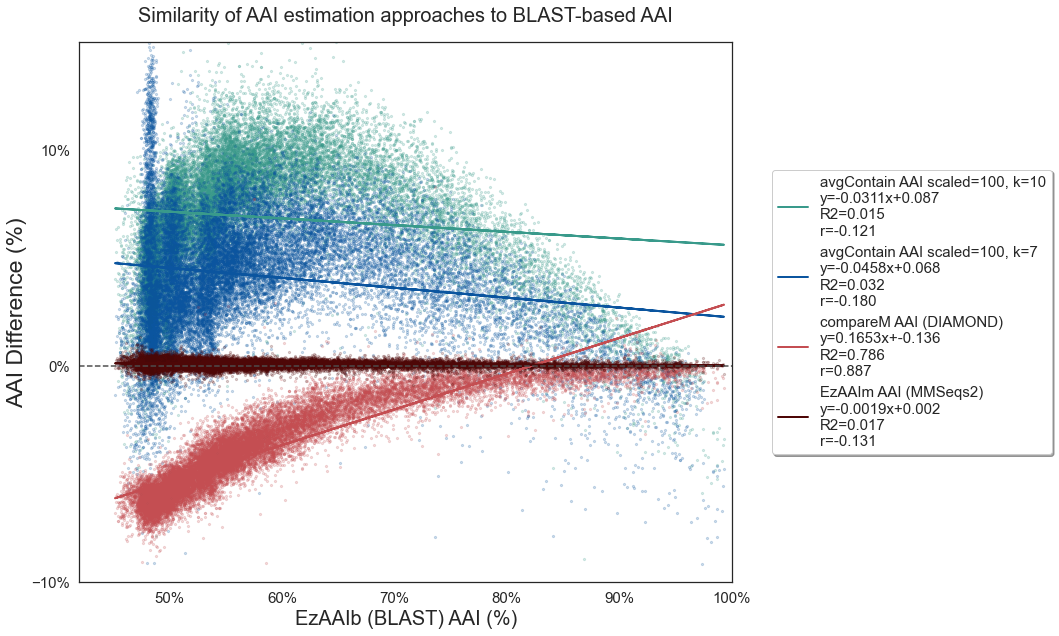

In [107]:
# do the linear regressions manually; plot all on same plot
kmer_vars = ["avgContain AAI"]#, "maxContain AAI"]
mapping_vars = ["compareM AAI", "EzAAIm AAI"]
vars_of_interest = kmer_vars + mapping_vars
labelD = {"jaccard AAI": "Jaccard", "maxContain AAI": "maxContain AAI", "avgContain AAI": "avgContain AAI", "compareM AAI": "compareM AAI (DIAMOND)", "EzAAIm AAI": "EzAAIm AAI (MMSeqs2)"}
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)


aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b", "EzAAIm AAI": "#4E0707",
              "EzAAIb AAI": "#4E0707"}

colorD = ["#399a8b","#0b559f"]

dfs = [scaled100_k10, scaled100_k7]
param_labels = ["scaled=100, k=10","scaled=100, k=7"]
alphaD = [0.2, 0.2]
linewidthD = [2, 2]

for n, df in enumerate(dfs):
    df = dfs[n]
    df = df.drop(columns= ["AAI"])
    for var in kmer_vars:
        x_col = "EzAAIb AAI"
        y_col = "AAIdiff"
        #color = aai_colors[var]
        color = colorD[n]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
        #r_value is pearson correlation coefficient
        predict_y = slope * var_df[x_col] + intercept
        # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
        r_squared = r2_score(var_df[y_col], predict_y)
        label = labelD[var] + " " + param_labels[n]
        line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)

for var in mapping_vars:
    x_col = "EzAAIb AAI"
    y_col = "AAIdiff"
    color = aai_colors[var]
    var_df = df[df['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(var_df[x_col], var_df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * var_df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(var_df[y_col], predict_y)
    label = labelD[var]# + " " + param_labels[n]
    line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
xlim=(0.42, 1)#None
ylim=(-0.1, 0.15)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
#ax.plot(xlim, ylim, ls="--",color="black") #c=".3"
plt.xlim(xlim)
plt.ylim(ylim)
ax.axhline(0, ls="--", c=".3")


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


    #plt.autoscale(True)
ax.set_ylabel("AAI Difference (%)", size=23)
ax.set_xlabel("EzAAIb (BLAST) AAI (%)", size=20)
    #plt.legend(loc = 'best')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Similarity of AAI estimation approaches to BLAST-based AAI", pad=20, size=20)
#fig.suptitle("Similarity of AAI estimation approaches to EzAAIm AAI", size=20)#, pad=20, size=20)
fig.tight_layout()
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k8.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k8.png", bbox_extra_artists=(lgd,), bbox_inches='tight')